In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import bats
from freudenthal import freudenthal_grid
import time
from tqdm import tqdm

In [2]:
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

Split 'validation' already downloaded
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [33.6s elapsed, 0s remaining, 135.3 samples/s]      
Dataset 'coco-2017-validation' created


In [3]:
sample = dataset.first()

In [4]:
image = Image.open(sample.filepath)

In [5]:
image.size

(640, 426)

In [6]:
img = np.array(image)
img = np.linalg.norm(img, axis=2)

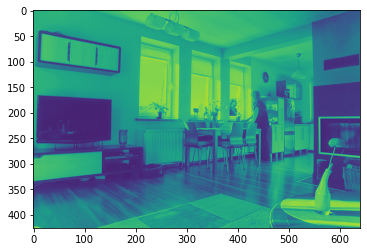

In [7]:
plt.imshow(img)

In [20]:
data = []

predictions_view = dataset.take(100, seed=51)
for sample in predictions_view:
    image = Image.open(sample.filepath)
    img = np.array(image)
    print(img.shape)
    data.append(np.linalg.norm(img, axis=2))


(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(478, 640, 3)
(491, 640, 3)
(359, 640, 3)
(612, 612, 3)
(500, 500, 3)
(428, 640, 3)
(640, 480, 3)
(334, 500, 3)
(422, 640, 3)
(375, 500, 3)
(427, 640, 3)
(375, 500, 3)
(480, 640, 3)
(428, 640, 3)
(320, 500, 3)
(640, 480, 3)
(640, 480, 3)
(521, 640, 3)
(427, 640, 3)
(640, 427, 3)
(561, 640, 3)
(555, 640, 3)
(640, 480, 3)
(640, 480, 3)
(500, 379, 3)
(427, 640, 3)
(427, 640, 3)
(427, 640, 3)
(480, 640, 3)
(480, 640, 3)
(425, 640, 3)
(428, 640, 3)
(640, 425, 3)
(517, 640, 3)
(612, 612, 3)
(427, 640, 3)
(480, 640, 3)
(640, 427, 3)
(384, 640, 3)
(640, 426, 3)
(640, 424, 3)
(576, 640, 3)
(482, 640, 3)
(400, 600, 3)
(640, 429, 3)
(515, 640, 3)
(480, 640, 3)
(640, 480, 3)
(427, 640, 3)
(612, 612, 3)
(606, 640, 3)
(640, 459, 3)
(427, 640, 3)
(480, 640, 3)
(500, 334, 3)
(640, 426, 3)
(640, 427, 3)
(480, 640, 3)
(612, 612, 3)
(480, 640, 3)
(480, 640, 3)
(640, 287, 3)
(640, 427, 3)
(480, 640, 3)
(640, 478, 3)
(426, 640, 3)
(426, 640, 3)
(640, 480, 3)
(480, 

In [8]:
img = np.array(image)
img = np.linalg.norm(img, axis=2)

In [9]:
m, n = img.shape
X = freudenthal_grid(m, n)

In [10]:
m, n = img.shape
X = freudenthal_grid(m, n)

t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, img.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

time to extend: 0.25898989698907826 sec.
time to construct: 0.4538107449916424 sec.
time to reduce: 7.410702870998648 sec.


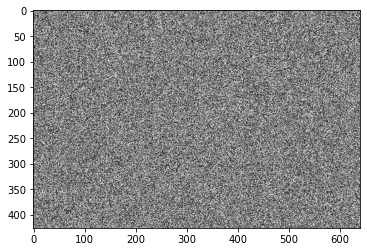

In [11]:
# todo: try a smooth function
aimg = np.random.rand(*img.shape)
plt.imshow(aimg, cmap=plt.get_cmap('gray'));

In [12]:
m, n = img.shape
X = freudenthal_grid(m, n)
print(img.shape)

# initialize on average image
irev = aimg
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, irev.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

# t0 = time.monotonic()
# R = bats.reduce(F, bats.F2())
# t1 = time.monotonic()
# print("time to reduce: {} sec.".format(t1 - t0))

(426, 640)
time to extend: 0.40173802300705574 sec.
time to construct: 0.9642477039888036 sec.


In [13]:
irev = img
t0 = time.monotonic()
R = bats.reduce(F, bats.F2()) # reduce from scratch
t1 = time.monotonic()
print("initial reduce {}".format(t1 - t0))

initial reduce 4.797493484002189


In [20]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, irev.flatten())
t1 = time.monotonic()
print("filt extension {}".format(t1 - t0))

t0 = time.monotonic()
R.update_filtration(vals)
t1 = time.monotonic()
print("filt update {}".format(t1 - t0))

filt extension 0.738485401001526
filt update 1.3655305209977087


In [14]:
def time_BATS_flags(img, img2, flags=(bats.standard_reduction_flag(), bats.compute_basis_flag())):
    m, n = img.shape
    X = freudenthal_grid(m, n)
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, img.flatten())
    F = bats.FilteredSimplicialComplex(X, vals)
    R = bats.reduce(F, bats.F2(), *flags)
    t1 = time.monotonic()
    print("compute1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, img2.flatten())
    F = bats.FilteredSimplicialComplex(X, vals)
    R = bats.reduce(F, bats.F2(), *flags)
    t1 = time.monotonic()
    print("compute2: {} sec.".format(t1 - t0))
    
    
flags = [
    (bats.standard_reduction_flag(), bats.compute_basis_flag()),
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.standard_reduction_flag(), bats.compression_flag()),
    (bats.extra_reduction_flag(), bats.compute_basis_flag()),
    (bats.extra_reduction_flag(),),
    (bats.extra_reduction_flag(), bats.clearing_flag()),
    (bats.extra_reduction_flag(), bats.compression_flag()),
]
labels = [
    "standard w/ basis",
    "standard w/ no basis",
    "standard w/ clearing",
    "standard w/ compression",
    "extra w/ basis",
    "extra w/ no basis",
    "extra w/ clearing",
    "extra w/ compression"
]
for flag, label in zip(flags, labels):
    print("\n{}:".format(label))
    time_BATS_flags(img, img, flag)


standard w/ basis:
compute1: 8.419858220993774 sec.
compute2: 9.352971961998264 sec.

standard w/ no basis:
compute1: 2.136128921993077 sec.
compute2: 2.4390638020122424 sec.

standard w/ clearing:
compute1: 1.5887677680002525 sec.
compute2: 2.0607306150050135 sec.

standard w/ compression:
compute1: 1.932231369006331 sec.
compute2: 2.4323829770000884 sec.

extra w/ basis:
compute1: 4.945662114987499 sec.
compute2: 6.746612617993378 sec.

extra w/ no basis:
compute1: 1.9356886250025127 sec.
compute2: 2.5481178760092007 sec.

extra w/ clearing:
compute1: 1.5887661299930187 sec.
compute2: 2.0931873519875808 sec.

extra w/ compression:
compute1: 1.8900349750038004 sec.
compute2: 2.4272883699886734 sec.


In [ ]:
text = []
tcon = []
tred = []

for img in tqdm(data):
    irev = img
    
    t0 = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, irev.flatten())
    t1 = time.monotonic()
    text.append(t1 - t0)

    t0 = time.monotonic()
    F = bats.FilteredSimplicialComplex(X, vals)
    t1 = time.monotonic()
    tcon.append(t1 - t0)

    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    tred.append(t1 - t0)

  3%|▎         | 3/100 [00:21<11:30,  7.12s/it]